# other/appendix: grab bag of other results

# load data and imports

In [39]:
import sys
print(sys.path)

['/home/laviniad/projects/religion_in_congress']


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import os
import nltk

tqdm.pandas()

In [41]:
DATA_PATH = "/data/laviniad/congress_errata/congress_df.json"
df = pd.read_json(DATA_PATH)
df['date'] = pd.to_datetime(df['date'].apply(str), format='%Y%m%d')
df['month'] = df['date'].dt.month

In [42]:
raw_df = df.copy()

# filter

In [43]:
def is_dem_rep(t):
    return (t == 'Democrat') or (t == 'Republican')

def not_procedural_unknown_topic(x):
    return (not ('Procedural' in x)) and (not ('Unknown' in x))

def is_long(x, thresh=5): # takes string, whitespace heuristic
    return len(x.split()) > thresh

def is_in_range(x):
    return x in range(1995, 2023)

df = df[df['party'].progress_apply(is_dem_rep)]
#df = df[df['main_topic'].progress_apply(not_procedural_unknown_topic)]
df = df[df['year'].progress_apply(is_in_range)]
df = df[df['text'].progress_apply(is_long)]

  0%|          | 0/1328805 [00:00<?, ?it/s]

  0%|          | 0/1203575 [00:00<?, ?it/s]

  0%|          | 0/1182286 [00:00<?, ?it/s]

In [ ]:
print(f"Filtered out {len(raw_df) - len(df)} rows")
print(f"New length: {len(df)}")

Filtered out 147411 rows
New length: 1181394


# plotting cell

In [ ]:
palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(18,14), 'font.weight': 'normal'}, style='whitegrid')

Words:
['intro', 'fruitfulness', 'lystra', 'wickedness', 'prayer', 'praying', 'saviour', 'faith', 'unbelieving', 'apostles', 'philistines', 'philippian', 'cana', 'sinners', 'sinfulness', 'hebrews', 'believeth', 'sidon', 'partakers', 'deliverer', 'ungodly', 'spafford', 'disciples', 'Immortal', 'godly', 'Christ', 'meekness', 'unclean', 'numthe', 'judea', 'tribulation', 'God', 'Saviour', 'nasb', 'dwelleth', 'abednego', 'scoffers', 'unbelief', 'messiah', 'sodom', 'horeb', 'antichrist', 'spurgeon', 'unbelievers', 'legalism', 'ungodliness', 'dissensions', 'yahweh', 'hast', 'romans', 'discipling', 'Bible', 'expositor', 'numas', 'deuteronomy', 'hebraic', 'philippi', 'inmost', 'pilate', 'repentance', 'doeth', 'publican', 'idols', 'levite', 'covetousness', 'sanhedrin', 'cephas', 'ephesus', 'godlessness', 'thessalonians', 'iniquity', 'disciple', 'pagans', 'swindoll', 'knoweth', 'galilee', 'israelite', 'pray', 'unbeliever', 'Redeemer', 'blessedness', 'epistles', 'Savior', 'thine', 'myrrh', 'concei

/tmp/ipykernel_149139/2177414759.py:11: RuntimeWarning: divide by zero encountered in log10
  counts = [np.log10(c) for c in counts]
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

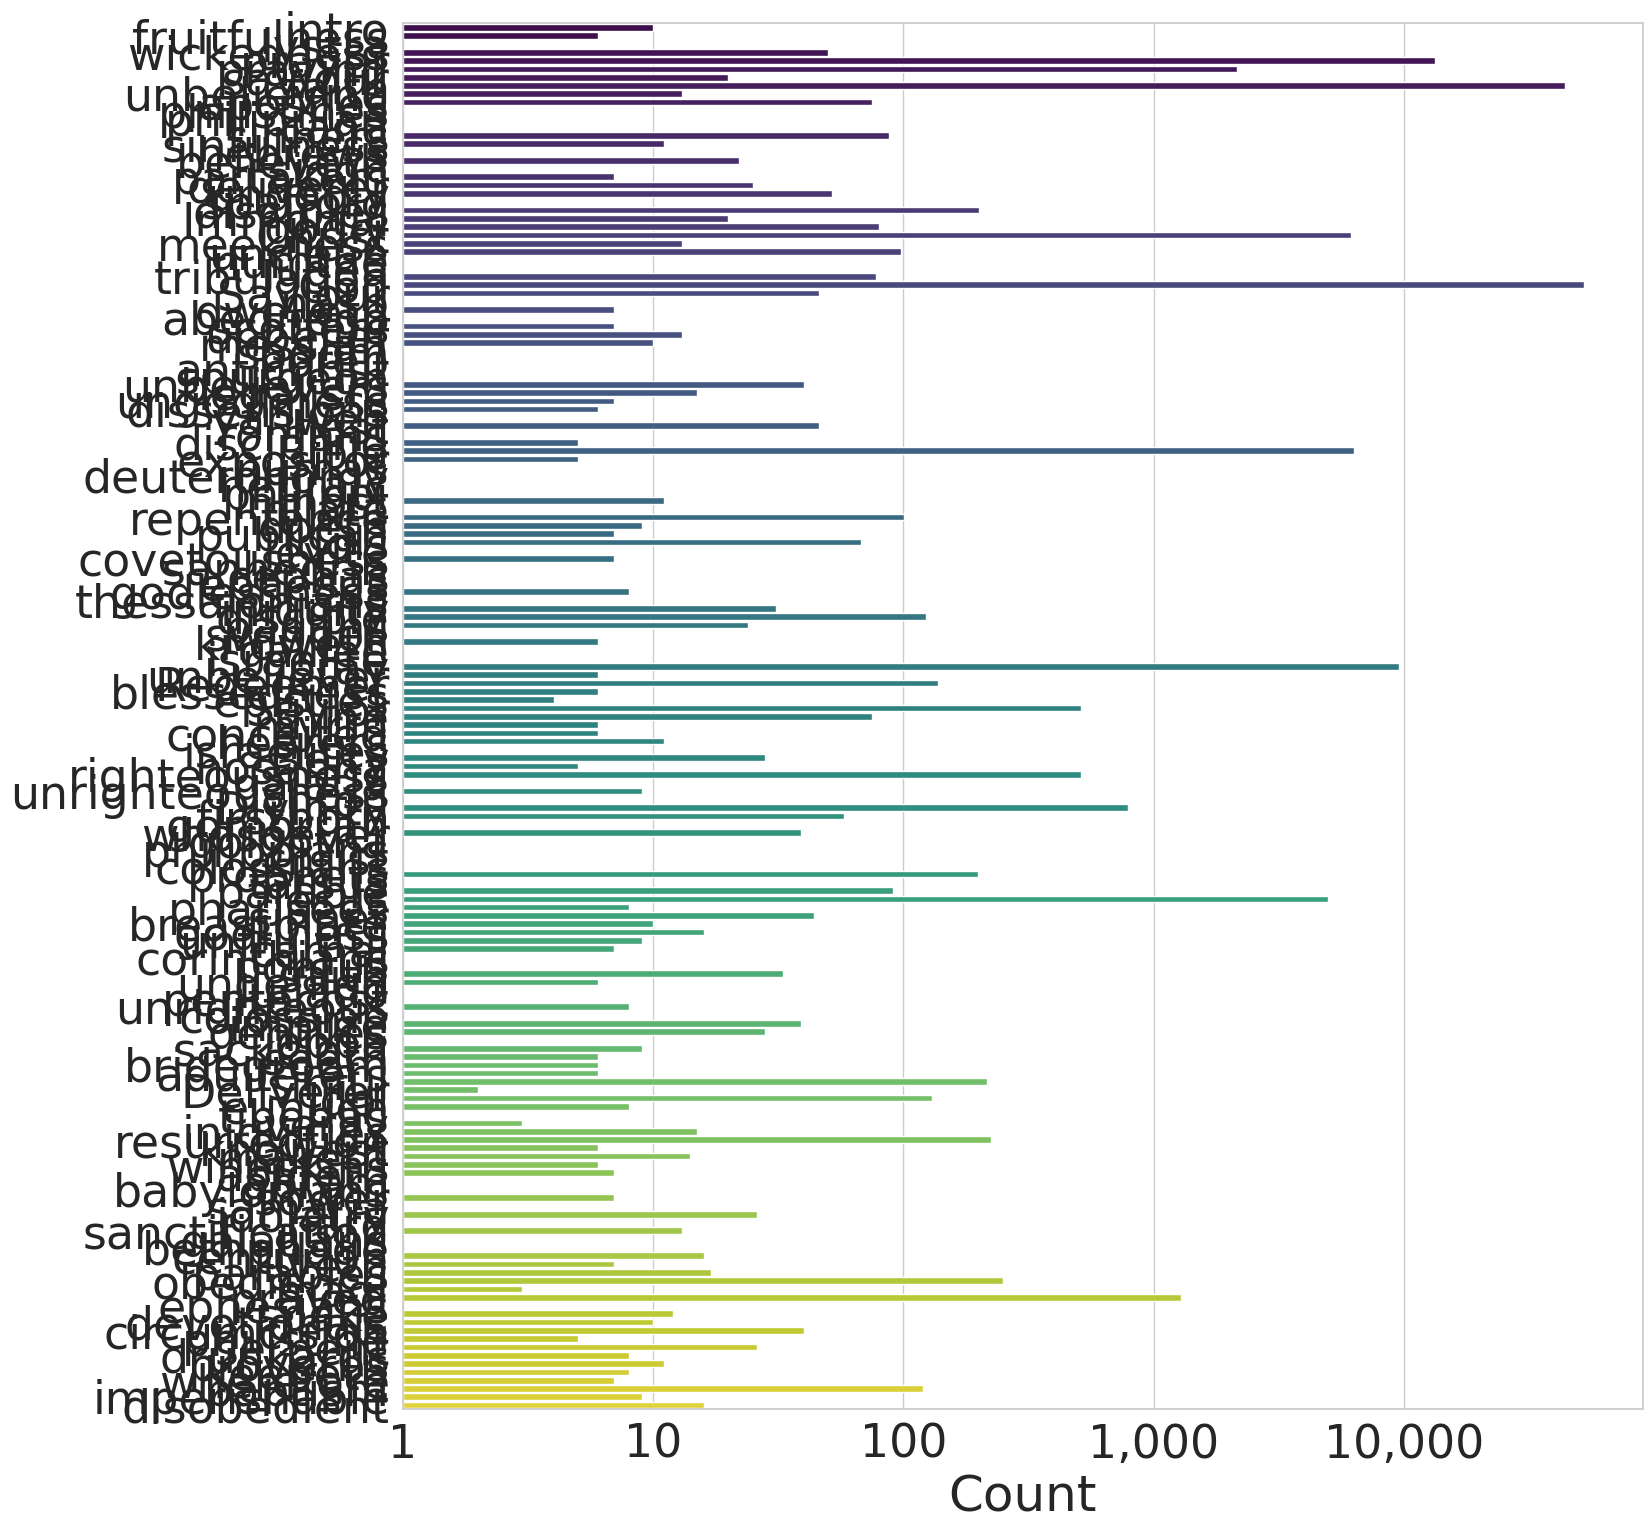

In [ ]:
# load result
import json
with open('/home/laviniad/projects/religion_in_congress/data/wordcounts/wordcounts.json', 'r') as f:
    result = json.load(f)

# sort result
result = sorted(result, key=lambda x: x[1])
words, counts = list(result.keys()), list(result.values())
print("Words:")
print(words)
print("Counts:")
print(counts)
counts = [np.log10(c) for c in counts]
print("Counts logged:")
print(counts)

palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(16,18), 'font.weight': 'normal'}, style='whitegrid')

sns.barplot(y=words,x=counts,hue=words,palette='viridis')
plt.xlabel('Count')

#plt.gca().set_xticks(np.log10([1, 10, 100, 1000, 10000, 100000]))  # Set the ticks to match the original values
plt.gca().set_xticklabels(['1', '10', '100', '1,000', '10,000', '100,000'])  # Change the ticks' names
plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/new_plots/word_counts.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

# keywords

In [29]:
import sys
import os

# Get the current project directory
project_path = os.getcwd()  # or set explicitly, e.g., "/path/to/your/project"

# Reset sys.path to include only your project directory
sys.path = ['/home/laviniad/projects/religion_in_congress']

In [30]:
from data.data_utils import get_lexical_overlap
import collections

# get counts
objs = df['text'].progress_apply(lambda x: get_lexical_overlap(x)) # each obj is count / len(speech), count_dict, type_dict, toked_length

# aggregate count_dicts
count_dict = collections.Counter()
for d in objs:
    count_dict.update(d[1])
     
result = dict(count_dict)

  0%|          | 0/1181394 [00:00<?, ?it/s]

In [31]:
print("Counter..."
      f"Total words: {sum(result.values())}, "
      f"Unique words: {len(result)}")

Counter...Total words: 145788, Unique words: 167


In [32]:
# save result to /home/laviniad/projects/religion_in_congress/data/wordcounts
import json
with open('/home/laviniad/projects/religion_in_congress/data/wordcounts/wordcounts.json', 'w') as f:
    json.dump(result, f)

Words:
['God', 'faith', 'prayer', 'pray', 'Bible', 'Christ', 'Jesus', 'praying', 'prayed', 'Divinity', 'Savior', 'righteousness', 'obedience', 'resurrection', 'sinful', 'disciples', 'prophets', 'Redeemer', 'Idol', 'disciple', 'baptism', 'repentance', 'unclean', 'parable', 'sinners']
Counts:
[52478, 44119, 13296, 9550, 6337, 6143, 4981, 2147, 1288, 788, 514, 511, 250, 225, 215, 201, 199, 138, 130, 123, 120, 101, 98, 91, 88]
Counts logged:
[4.719977275195442, 4.644625660173327, 4.123721006440036, 3.9800033715837464, 3.80188370712524, 3.7883805153195635, 3.697316541732383, 3.331832044436249, 3.1099158630237933, 2.8965262174895554, 2.710963118995276, 2.708420900134713, 2.3979400086720375, 2.3521825181113627, 2.3324384599156054, 2.303196057420489, 2.298853076409707, 2.1398790864012365, 2.113943352306837, 2.089905111439398, 2.0791812460476247, 2.0043213737826426, 1.9912260756924949, 1.9590413923210936, 1.9444826721501687]


/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key

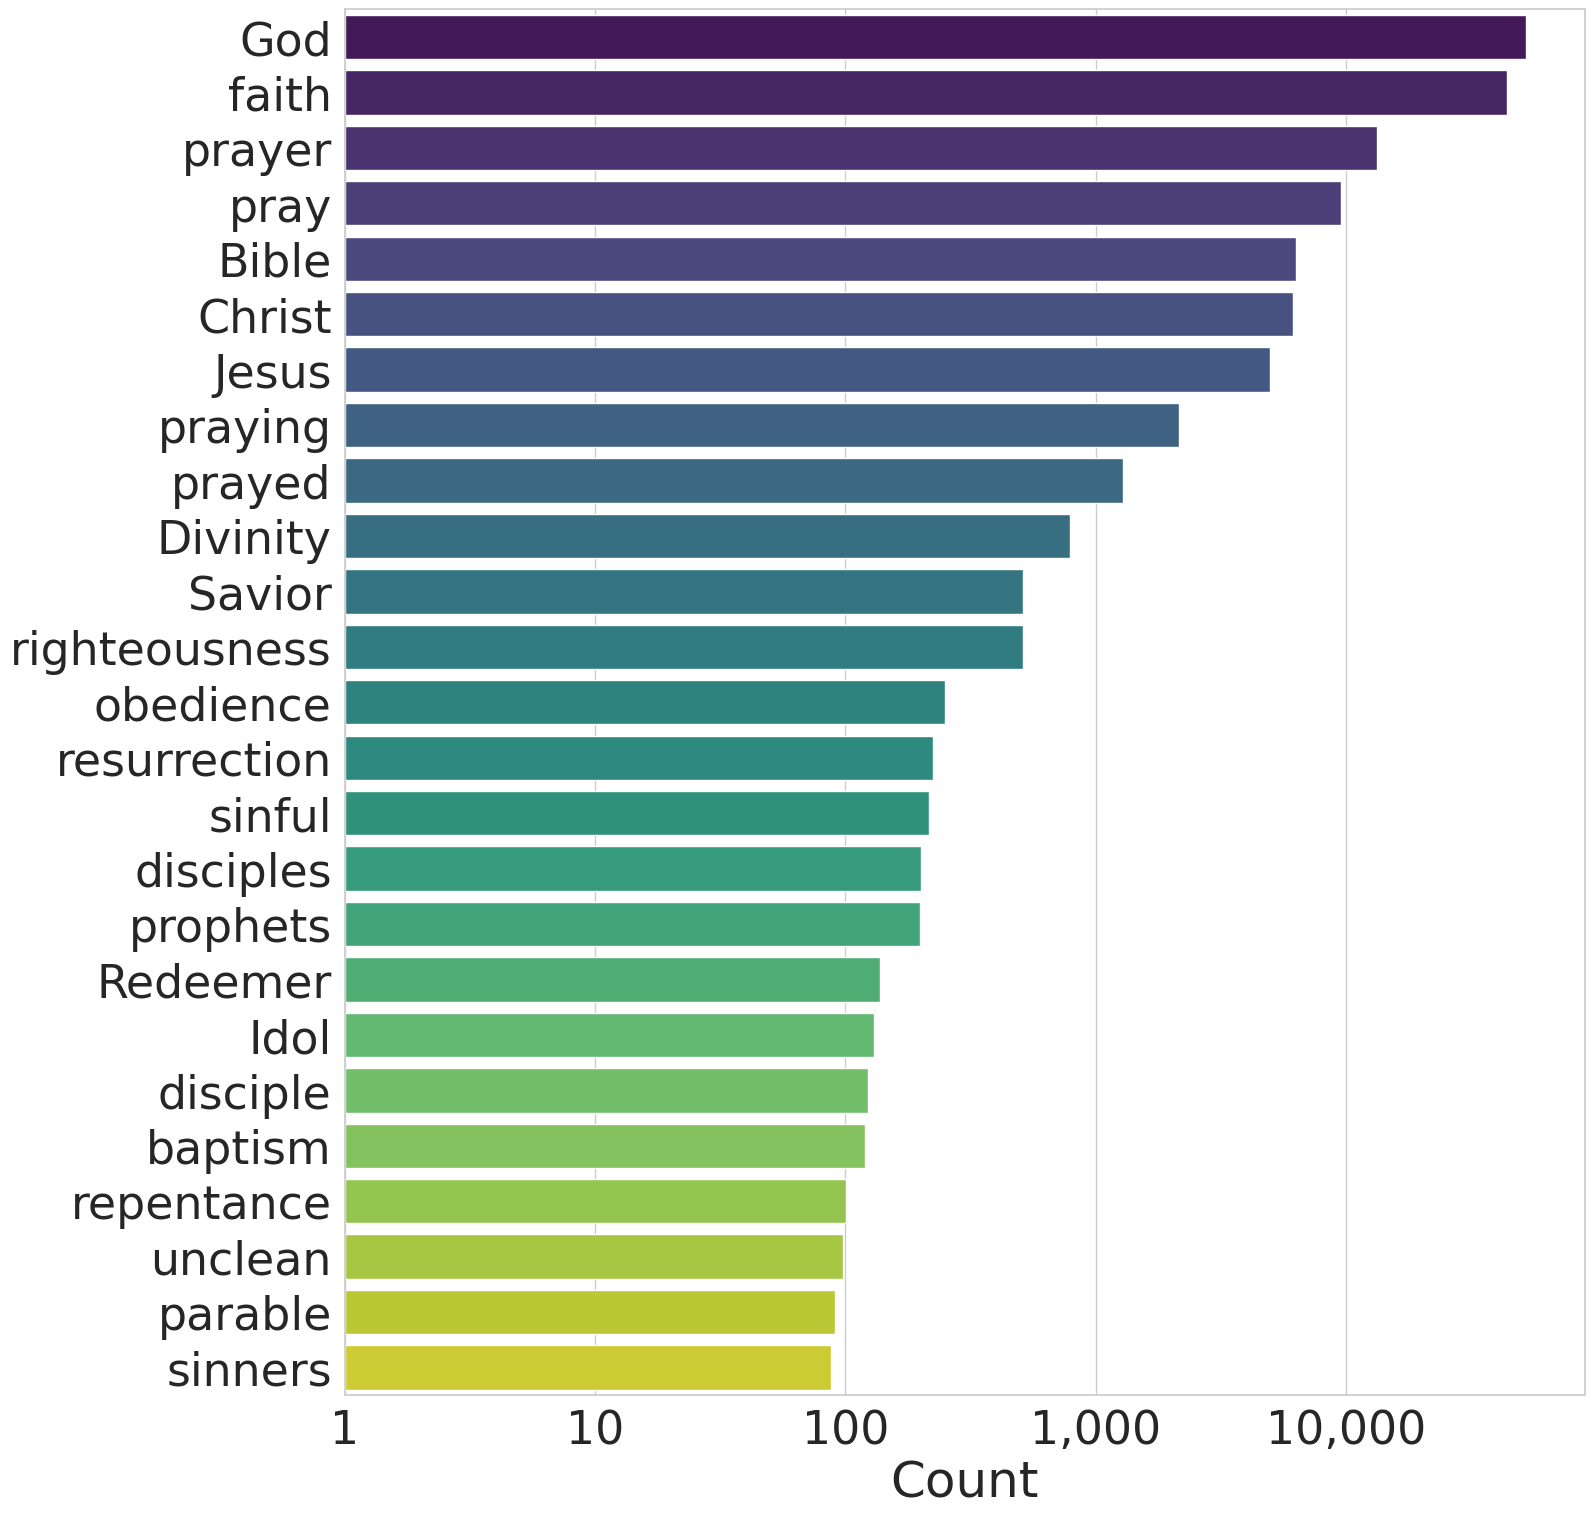

In [33]:
# plot results
import matplotlib.ticker as ticker
agg_pray = False

if agg_pray:
    PRAY_WORDS = ['pray', 'praying', 'prayer', 'prayed']
    results_with_pray_forms_combined = result.copy()
    results_with_pray_forms_combined['pray*'] = sum([results_with_pray_forms_combined.get(w, 0) for w in PRAY_WORDS])
    result = dict(sorted(results_with_pray_forms_combined.items(), key=lambda item: item[1], reverse=True)[:25])
else:
    result = dict(sorted(result.items(), key=lambda item: item[1], reverse=True)[:25])

words, counts = list(result.keys()), list(result.values())
print("Words:")
print(words)
print("Counts:")
print(counts)
counts = [np.log10(c) for c in counts]
print("Counts logged:")
print(counts)

palette = {'Democrat': 'blue', 'Republican': 'red', 'New Progressive': 'grey', 'Popular Democrat': 'grey', 'Independence Party (Minnesota)': 'grey', 'Anti-Jacksonian': 'grey', 'Independent': 'green', 'unknown': 'black', 'Democrat Farmer Labor': 'blue'}
sns.set(context="notebook", font_scale=3, rc={'figure.figsize':(16,18), 'font.weight': 'normal'}, style='whitegrid')

sns.barplot(y=words,x=counts,hue=words,palette='viridis')
plt.xlabel('Count')

#plt.gca().set_xticks(np.log10([1, 10, 100, 1000, 10000, 100000]))  # Set the ticks to match the original values
plt.gca().set_xticklabels(['1', '10', '100', '1,000', '10,000', '100,000'])  # Change the ticks' names
plt.savefig("/home/laviniad/projects/religion_in_congress/notebooks/plots/new_plots/word_counts.pdf", format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
plt.savefig('/home/laviniad/projects/religion_in_congress/notebooks/plots/new_plots/word_counts.pdf', format='pdf', bbox_inches='tight')

<Figure size 1600x1800 with 0 Axes>

# topic exploratory plot

In [35]:
# fixing data

labels = '/home/laviniad/projects/religion_in_congress/data/labeled_topics.csv'
labels = pd.read_csv(labels, header=None)
name_to_words = dict(zip(labels[3], labels[2]))
name_to_words = {k: '_'.join(v.split()[:3]) for k, v in name_to_words.items()}

In [36]:
name_to_words

{'HonoringCommunityService': 'NUM_community_county',
 'Transportation': 'transportation_NUM_security',
 'JobsEconomy': 'jobs_small_business',
 'Procedural1': 'NUM_consent_unanimous',
 'Abortion': 'women_abortion_life',
 'Courts': 'court_judge_senate',
 'ResearchTechnologyScience': 'research_technology_science',
 'PublicLand': 'NUM_national_land',
 'Bills': 'bill_house_republican',
 'Drugs': 'drug_drugs_NUM',
 'LawEnforcement': 'law_NUM_enforcement',
 'CommitteesAndBills': 'NUM_committee_house',
 'Labor': 'workers_NUM_employees',
 'FunctionWords': 'would_amendment_think',
 'Presidents': 'president_administration_said',
 'ElectionsVoting': 'NUM_election_rights',
 'NaturalDisastersCOVID': 'NUM_emergency_fire',
 'LegislationResults': 'federal_would_bill',
 'Immigration': 'border_immigration_NUM',
 'NuclearWeapons': 'nuclear_weapons_iran',
 'IntelligenceInformation': 'intelligence_NUM_information',
 'PoliteTermsOfAddress': 'gentleman_speaker_chairman',
 'SenateProcedural': 'NUM_senate_conse

In [37]:
df_topic = []
for topic in df['main_topic'].unique():
    rows = df[df['main_topic'] == topic]
    yes_religious_token_count = len(rows[rows['binary_lex'] == 1])
    no_religious_token_count = len(rows[rows['binary_lex'] == 0])
    if topic != 'nonlabeled':
        result_dict = {'topic': name_to_words[topic], 'yes_relig': yes_religious_token_count, 'no_relig': no_religious_token_count}
        df_topic.append(result_dict)

df_topic = pd.DataFrame(df_topic)

KeyError: 'main_topic'

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats

# make topic distribution for no religious tokens
df_topic['no_relig_dist'] = df_topic['no_relig'] / df_topic['no_relig'].sum()
df_topic['yes_relig_dist'] = df_topic['yes_relig'] / df_topic['yes_relig'].sum()
df_topic['diff_dist'] = df_topic['yes_relig_dist'] - df_topic['no_relig_dist']

def proportion_std_error(count, total):
    proportion = count / total
    return np.sqrt(proportion * (1 - proportion) / total)

df_topic['no_relig_std'] = df_topic.apply(lambda row: proportion_std_error(row['no_relig'], df_topic['no_relig'].sum()), axis=1)
df_topic['yes_relig_std'] = df_topic.apply(lambda row: proportion_std_error(row['yes_relig'], df_topic['yes_relig'].sum()), axis=1)

df_topic['diff_sd'] = np.sqrt(df_topic['no_relig_std']**2 + df_topic['yes_relig_std']**2)
df_topic.sort_values('diff_dist', inplace=True)
topics = df_topic.index.tolist()
means = df_topic['diff_dist'].values
errors = df_topic['diff_sd'].values

# plot difference by topic
plt.figure(figsize=(18, 30))
plt.xlim(-0.004, 0.0025)
sns.pointplot(data=df_topic, x='diff_dist', y='topic', hue='topic', palette='viridis')
# plot errors
plt.errorbar(data=df_topic, y='topic', x='diff_dist', xerr='diff_sd', ecolor='gray', lw=1, fmt='none')
plt.axvline(x=0, color='black', linewidth=1.5)
plt.xlabel('Portion of Speeches with Religious Tokens - Portion of Speeches without')
plt.ylabel('Topic')
plt.show()

NameError: name 'df_topic' is not defined

/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

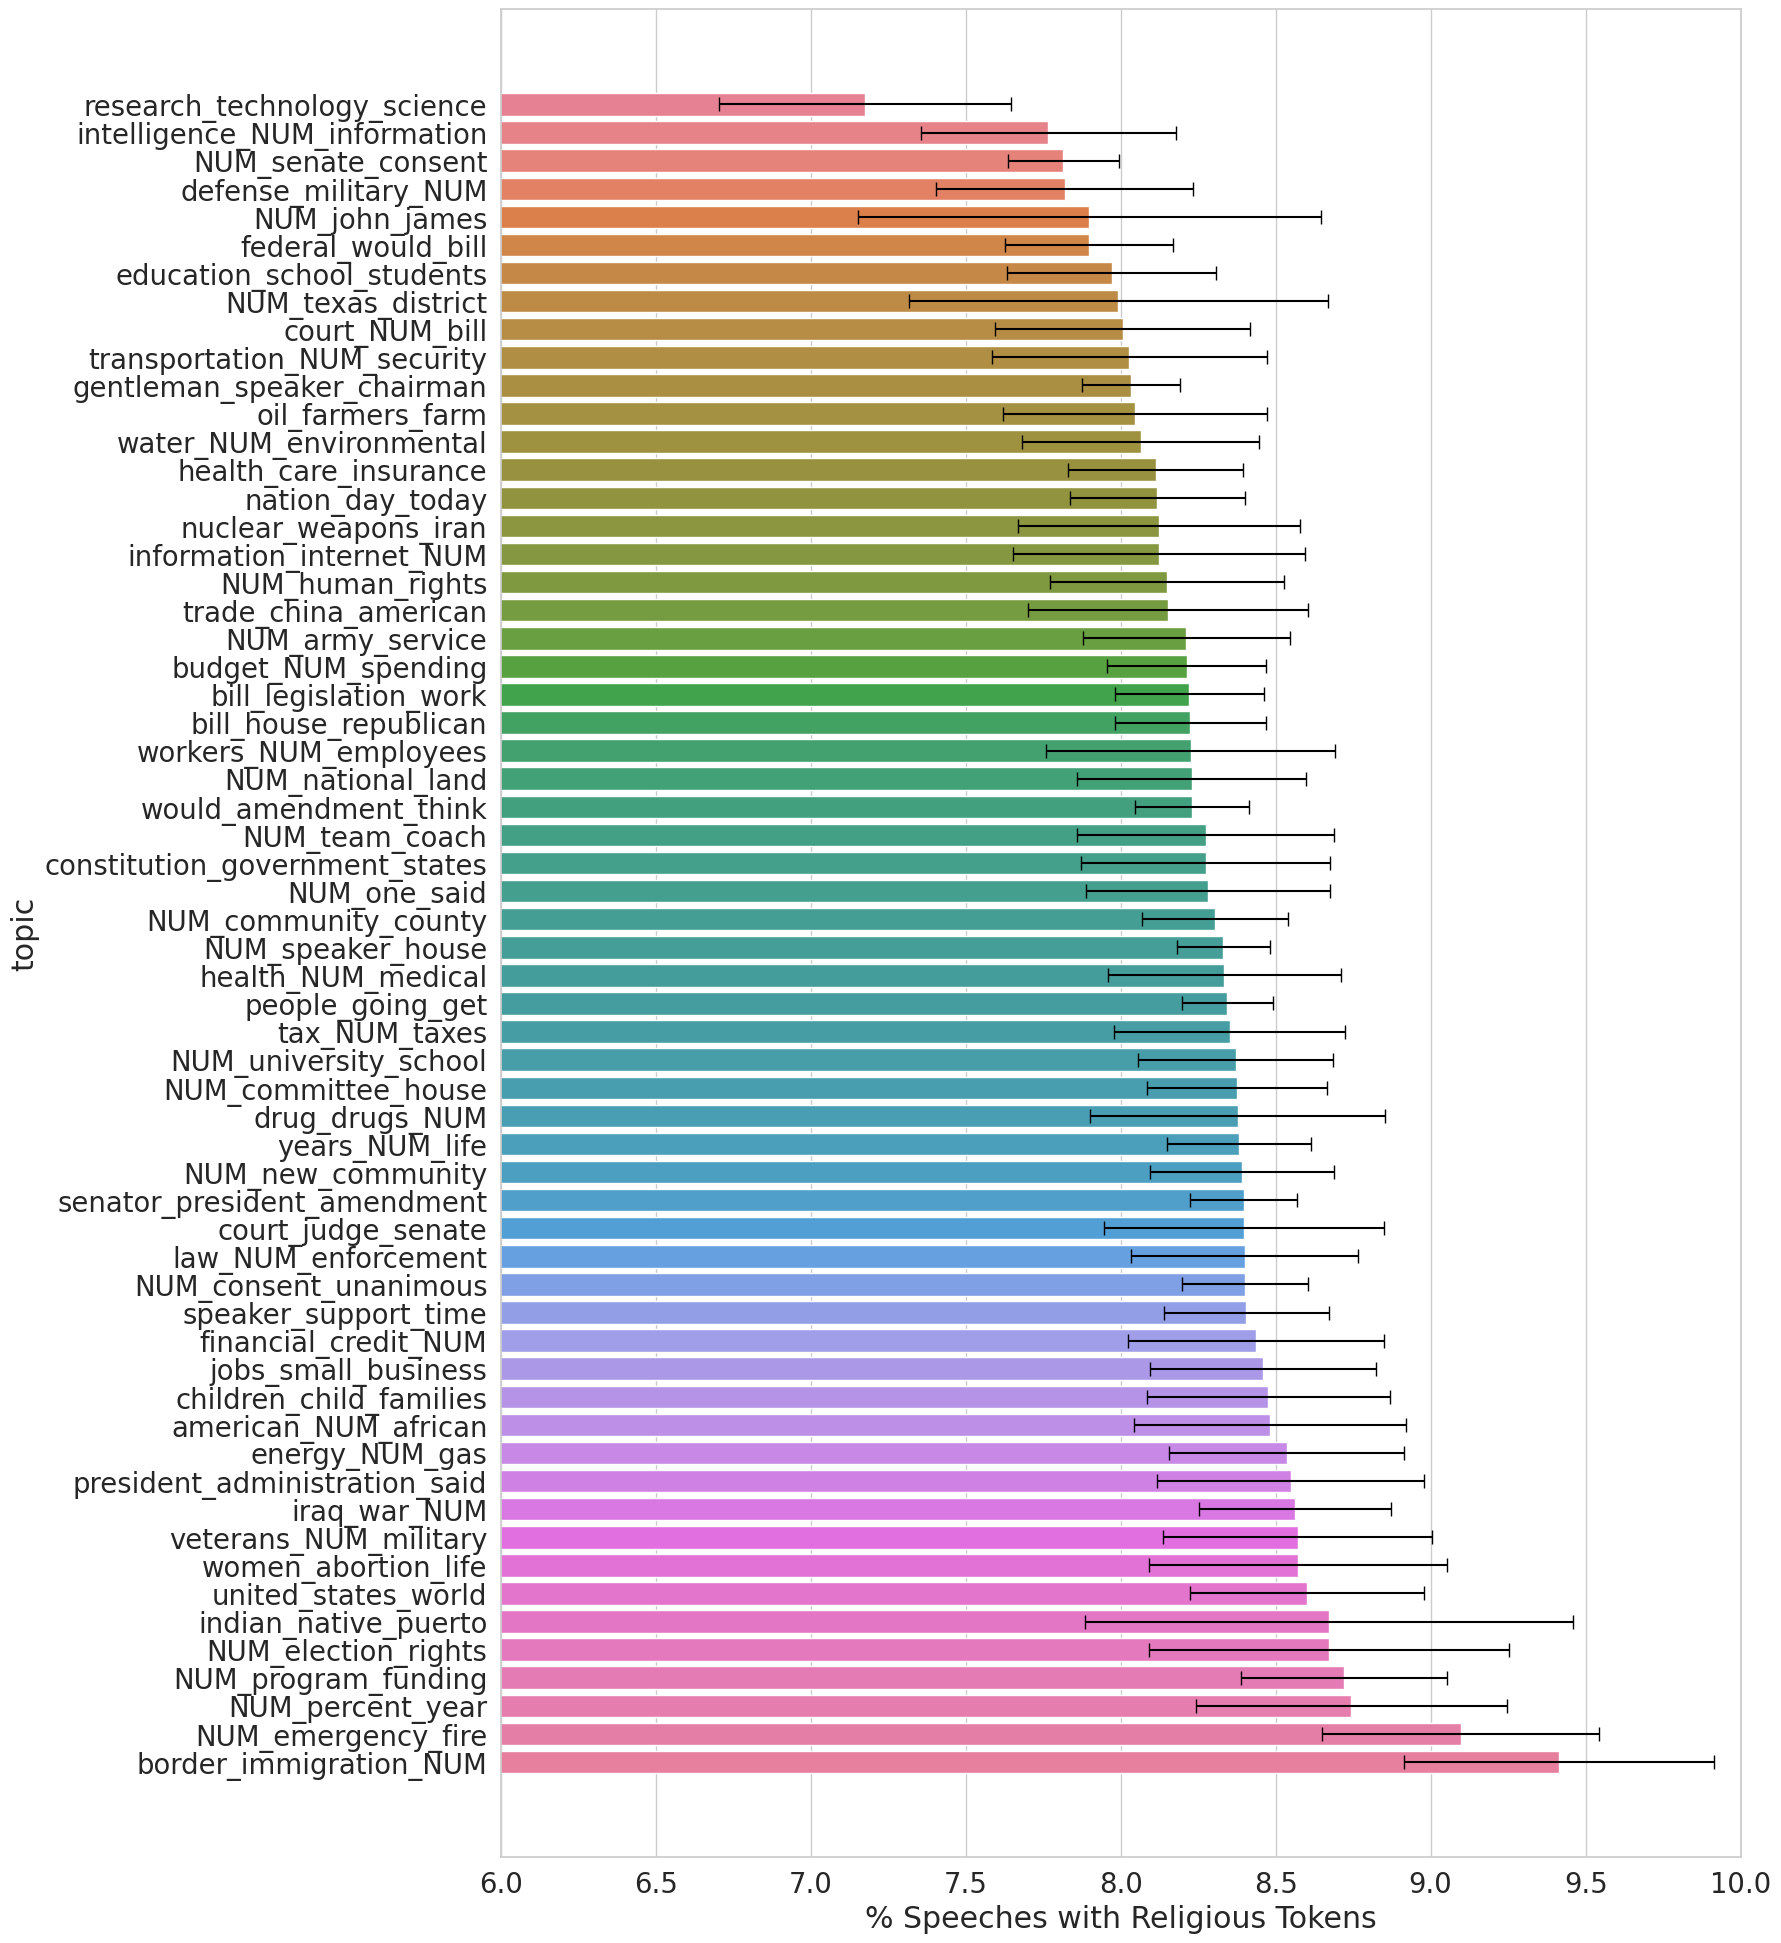

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

def return_wilson_low(row):
    return stats.binom.interval(0.95, row['yes_relig'] + row['no_relig'], 0.5)[0] - row['no_relig']

def return_wilson_high(row):
    return stats.binom.interval(0.95, row['yes_relig'] + row['no_relig'], 0.5)[1] - row['no_relig']


# calc the differences
plt.figure(figsize=(16, 24))
df_topic['difference'] = df_topic['no_relig'] - df_topic['yes_relig']
df_topic['p_relig'] = df_topic['yes_relig'] / (df_topic['yes_relig'] + df_topic['no_relig'])
df_topic['se'] = np.sqrt(df_topic['p_relig'] * (1 - df_topic['p_relig']) / (df_topic['yes_relig'] + df_topic['no_relig']))
df_topic.sort_values(by='p_relig', inplace=True)
df_topic.reset_index(drop=True, inplace=True)

# Calculate the 95% confidence interval
df_topic['ci_low'] = df_topic.apply(return_wilson_low, axis=1)
df_topic['ci_high'] = df_topic.apply(return_wilson_high, axis=1)

# Plot
df_topic['p_relig'] = df_topic['p_relig'] * 100
df_topic['se'] = df_topic['se'] * 100
# instead make plot x-axis start at 5%
plt.xlim(6, 10)
sns.barplot(data=df_topic, x='p_relig', y='topic', errorbar=None, hue='topic')
for i in range(len(df_topic)):
    # recenter CIs to be around the difference
    ci_low = df_topic['difference'][i] - df_topic['ci_low'][i]
    ci_high = df_topic['ci_high'][i] - df_topic['difference'][i]
    ci_scalar = abs(ci_low - ci_high) / 2
    plt.errorbar(x=df_topic['p_relig'][i], y=i, xerr=df_topic['se'][i], color='black', capsize=5)
#plt.xlabel('# Speeches w/o Religious Tokens - # Speeches w/ Religious Tokens')
plt.xlabel("% Speeches with Religious Tokens")
plt.show()

# speaker religiosity

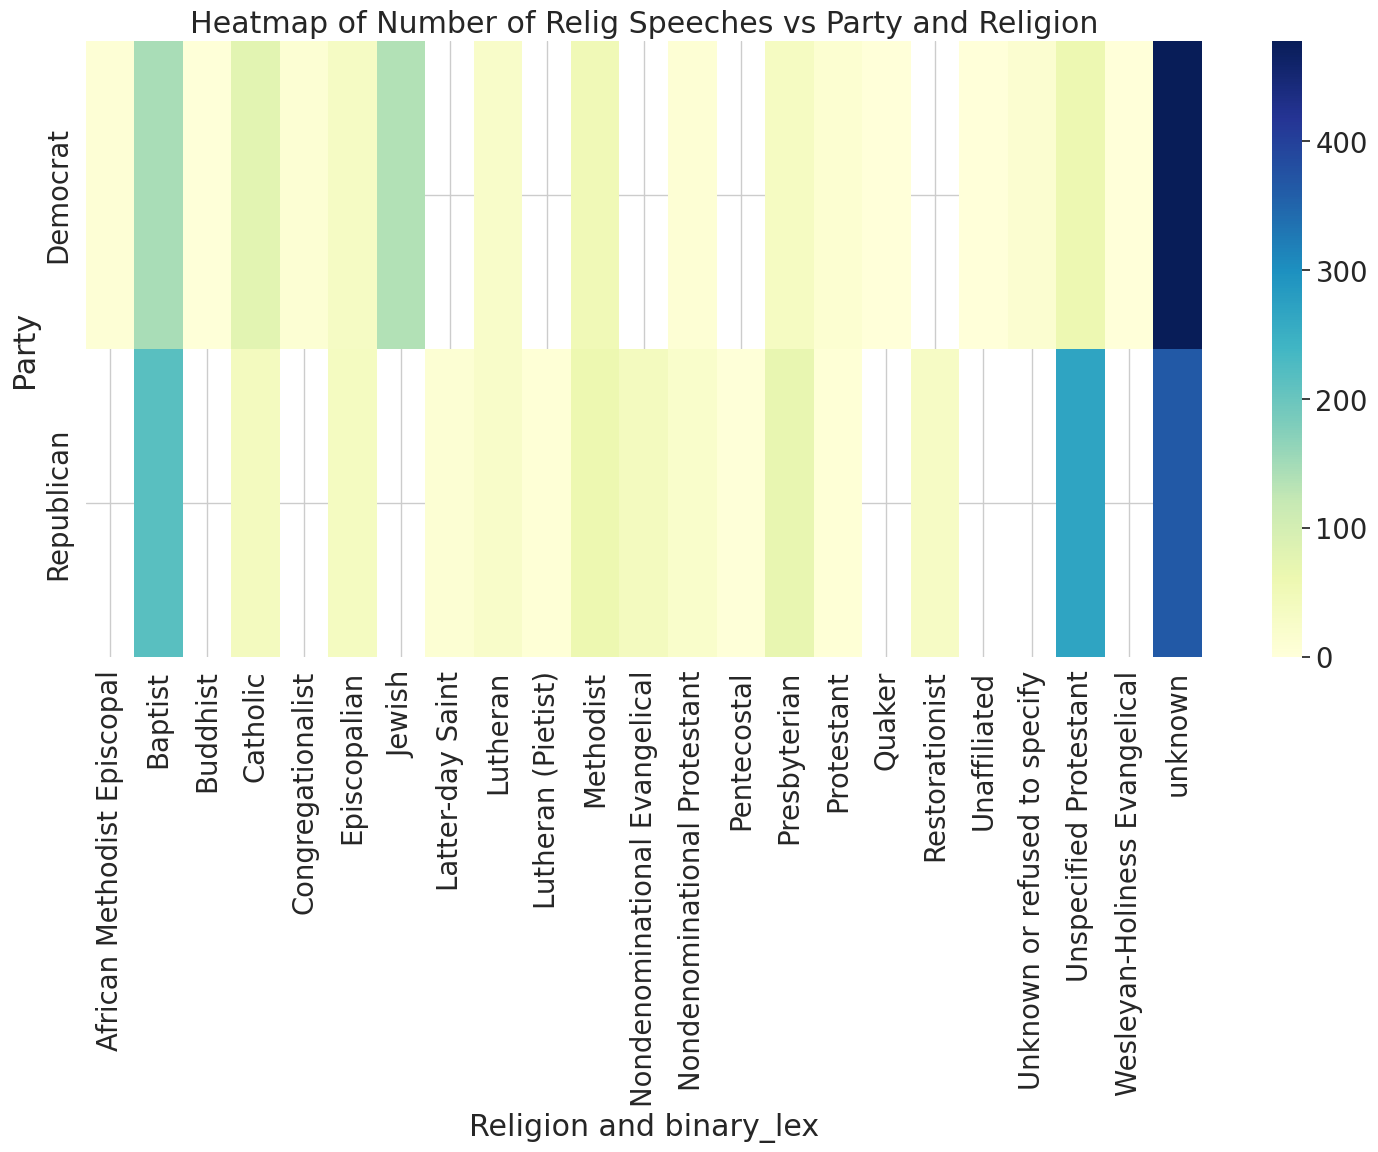

In [ ]:
crosstab = pd.crosstab(df_118['party'], [df_118['religion']], values=df_118['binary_lex'], aggfunc='sum')

plt.figure(figsize=(18, 8))
sns.heatmap(crosstab, cmap="YlGnBu", fmt=".2f")
plt.title('Heatmap of Number of Relig Speeches vs Party and Religion')
plt.xlabel('Religion and binary_lex')
plt.ylabel('Party')
plt.show()

/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

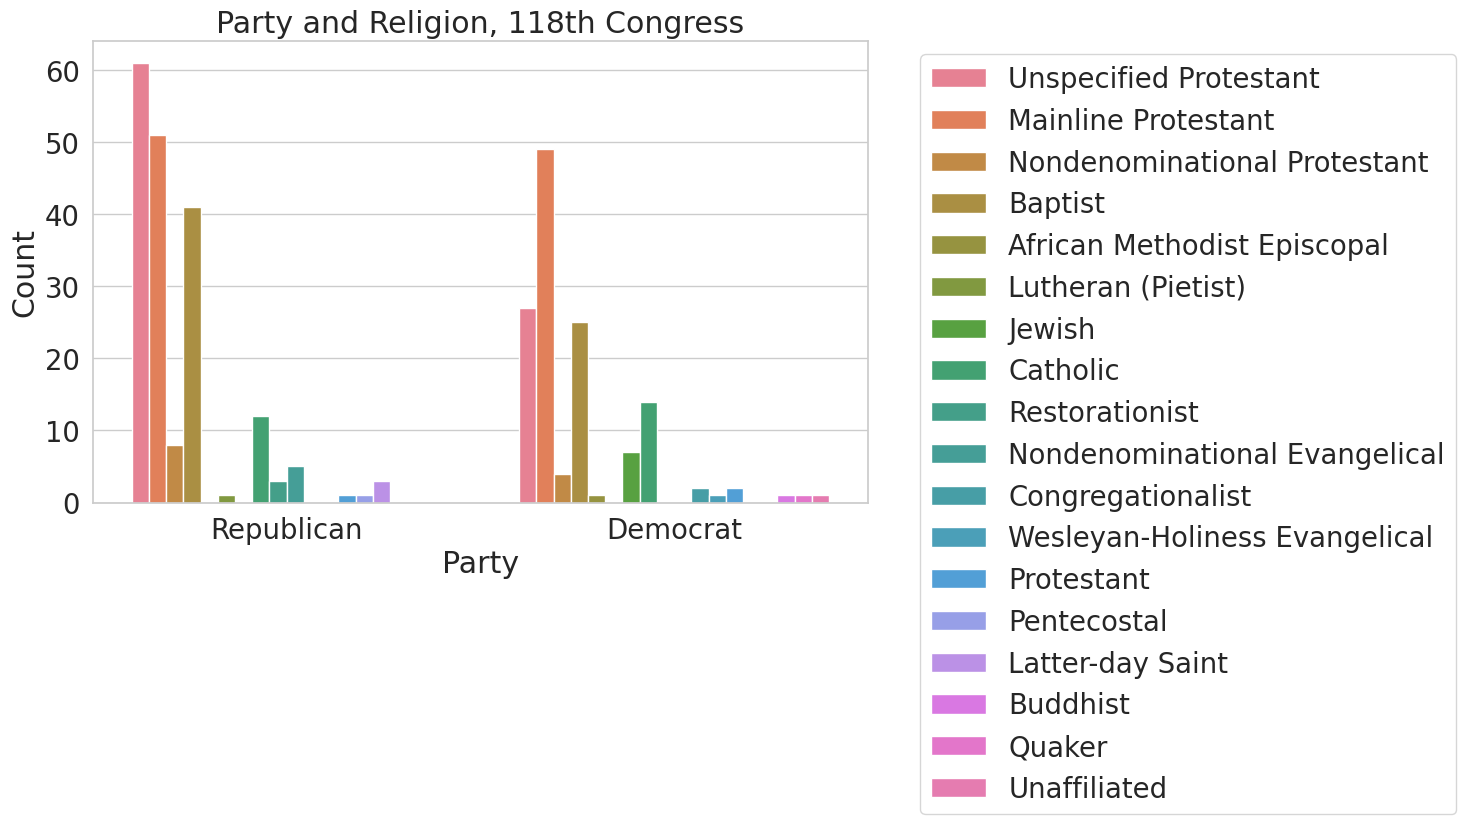

In [ ]:
relig_unique = df_118.drop_duplicates(subset=['bio_id'])
relig_unique = relig_unique[(relig_unique['religion'] != 'Unknown or refused to specify') & (relig_unique['religion'] != 'unknown')]
mainline_prot = ['Lutheran', 'Episcopalian', 'Methodist', 'Presbyterian', 'Lutheran (Pietist)']
relig_unique['religion'] = ['Mainline Protestant' if x in mainline_prot else x for x in relig_unique['religion']]

plt.figure(figsize=(10, 6))
sns.countplot(data=relig_unique, x='party', hue='religion')
plt.title('Party and Religion, 118th Congress')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Party')
plt.ylabel('Count')
plt.show()

# LR validation things

(0.0002, 1.0)

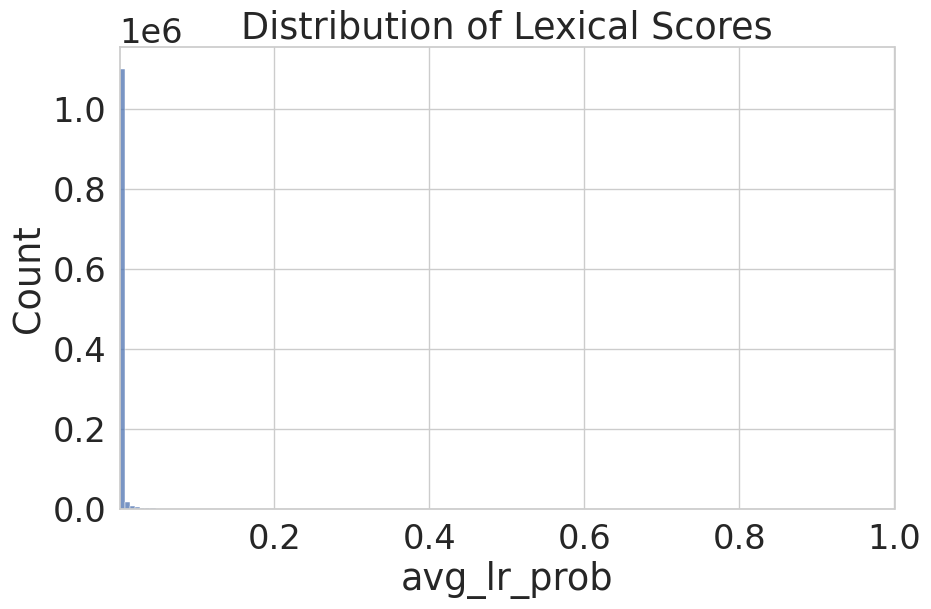

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_lr_prob'], bins=150)
plt.title("Distribution of Lexical Scores")
plt.xlim(0.0002,1)  # Adjust the x-axis limits


In [ ]:
# pearson r correlation of avg_lr_prob with lexical
print("Pearson r correlation of avg_lr_prob with lexical")
from scipy.stats import pearsonr

clean_df = df.dropna(subset=['avg_lr_prob','lexical'])
pearsonr(clean_df['avg_lr_prob'], clean_df['lexical'])

Pearson r correlation of avg_lr_prob with lexical


PearsonRResult(statistic=0.3541638251599553, pvalue=0.0)

In [ ]:
from pprint import pprint

for e in df[df['avg_lr_prob'] > 0.6]['text'].sample(25):
    print(e[:250] + '\n')

Mr. ETHERIDGE. Madam Speaker, I rise today to congratulate Matt and Jennifer Allen on the birth of their child, Dyan Wade Allen. Dyan was born on Tuesday, August 7, 2007, and weighed 6 pounds and 12 ounces. My wife Faye joins me in wishing Matt and J

Mr. BURNS. Mr. President, I am honored to serve as one of this year's congressional co-chairs for National Bible Week, sponsored by the National Bible Association. This observance occurs during the week of November 19-26, 2000, the week during which 

Mr. CLINGER. Mr. Speaker, it is with great pleasure that I rise in honor of the 110th celebration of Groundhog Day, February 2, 1996. Although it is almost 4 weeks late I am pleased to announce only 2 more weeks of winter left according to the 1996 p

Mr. BOST. Mr. Speaker, I rise today, if I could, to take a moment. I would like to read a part of a particular proverb, Proverbs 31:10-31: An excellent wife, who can find? She is more precious than jewels. The heart of her husband trusts in her

In [ ]:
import re
import pickle as pkl
from nltk import word_tokenize

def clean_text(text):
    """
    Cleans the given text by removing URLs, HTML tags, special characters, and converting to lowercase.
    
    Args:
        text (str): The text to be cleaned.
    
    Returns:
        str: The cleaned text.
    """
    text = text.lower()
    text = re.sub(r'http\S+', '', str(text)) # remove URLs
    text = text.replace(' amp ', ' and ') # replace non-escaped ampersand

    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # remove tokens with no letters
    text = re.sub(r'\b\t+\b', '', text)
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    
    return text

lr_model_path = "/data/laviniad/religious_speech_classifier_data/tfidf_lr_pipeline.pkl"

print("Loading model from file")
with open(lr_model_path, 'rb') as f:
    tfidf_lr_pipe = pkl.load(f)
    print(f"Loaded model from {f.name}")

Loading model from file


/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loaded model from /data/laviniad/religious_speech_classifier_data/tfidf_lr_pipeline.pkl


/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle es

In [ ]:
from nltk import sent_tokenize

sample_congress_path = '/data/laviniad/religious_speech_classifier_data/congress_sample.csv'
sample_sermon_path = '/data/laviniad/religious_speech_classifier_data/sermon_sample.csv'

sample_congress_df = pd.read_csv(sample_congress_path)
sample_sermon_df = pd.read_csv(sample_sermon_path)

sample_sermon_df['sentences'] = sample_sermon_df['text'].progress_apply(sent_tokenize)
sample_congress_df['sentences'] = sample_congress_df['text'].progress_apply(sent_tokenize)
sample_sermon_df = sample_sermon_df.explode('sentences').reset_index(drop=True)
sample_congress_df = sample_congress_df.explode('sentences').reset_index(drop=True)
sample_sermon_df.drop('text', axis=1, inplace=True)
sample_congress_df.drop('text', axis=1, inplace=True)

c_labels = sample_congress_df['label']
c_text = sample_congress_df['sentences']
s_labels = sample_sermon_df['label']
s_text = sample_sermon_df['sentences']

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
data_labels = pd.concat([c_labels, s_labels])
data_text = pd.concat([c_text, s_text])

In [ ]:
lr = tfidf_lr_pipe.named_steps['lr']
tfidf = tfidf_lr_pipe.named_steps['tfidf']
lr_coef_inverse_weights = lr.coef_ * tfidf_lr_pipe.named_steps['tfidf'].idf_
top_words = 100
print(f"Top N={top_words} words for each class")

sorted_indices = np.argsort(lr_coef_inverse_weights[0])
top = sorted_indices[:top_words]
print("Most congress-y unigrams and bigrams: " + str(np.array(tfidf.get_feature_names_out())[top]))

sorted_indices = np.argsort(lr_coef_inverse_weights[0])
top = sorted_indices[-top_words:]
print("Most congress-y unigrams and bigrams: " + str(np.array(tfidf.get_feature_names_out())[top]))

Top N=100 words for each class
Most congress-y unigrams and bigrams: ['senator' 'congress' 'god bless' 'amendment' 'daca' 'ms' 'mr'
 'legislation' 'hr' 'colleagues' 'rep' 'senators' 'senate' 'percent'
 'federal' 'medicare' 'policy' 'amendments' 'constituents' 'americans'
 'votes' 'republicans' 'bill' 'congressman' 'president' 'democracy'
 'administration' 'this body' 'vote' 'billion' 'economy' 'democrats'
 'district' 'immigration' 'chart' 'tax' 'constitution' 'republican'
 'funding' 'border' 'obamacare' 'budget' 'legislative' 'committee'
 'reform' 'veterans' 'trillion' 'iraq' 'industry' 'bipartisan' 'china'
 'chamber' 'program' 'nuclear' 'washington' 'constitutional' 'companies'
 'speaker' 'taxpayers' 'deficit' 'medicaid' 'undocumented'
 'american people' 'nomination' 'democratic' 'nato' 'inflation' 'economic'
 'consumers' 'american' 'americas' 'iran' 'mrs' 'vietnamese' 'county'
 'partisan' 'seniors' 'congressional' 'government' 'sergeant'
 'impeachment' 'this bill' 'hearings' 'chairma

In [ ]:
lr = tfidf_lr_pipe.named_steps['lr']
tfidf = tfidf_lr_pipe.named_steps['tfidf']
lr_coef_weights = lr.coef_ * tfidf_lr_pipe.named_steps['tfidf'].idf_
top_words = 100
print(f"Top N={top_words} words for each class")

sorted_indices = np.argsort(lr_coef_weights[0])
top = sorted_indices[:top_words]
print("Most congress-y unigrams and bigrams: ")
for i in str(np.array(tfidf.get_feature_names_out())[top]).split(' '):
    print(i)

sorted_indices = np.argsort(lr_coef_weights[0])
top = list(reversed(sorted_indices[-top_words:]))
print("Most sermon-y unigrams and bigrams: ")
for i in str(np.array(tfidf.get_feature_names_out())[top]).split(' '):
    print(i)

Top N=100 words for each class
Most congress-y unigrams and bigrams: 
['senator'
'congress'
'god
bless'
'amendment'
'daca'
'ms'
'mr'

'legislation'
'hr'
'colleagues'
'rep'
'senators'
'senate'
'percent'

'federal'
'medicare'
'policy'
'amendments'
'constituents'
'americans'

'votes'
'republicans'
'bill'
'congressman'
'president'
'democracy'

'administration'
'this
body'
'vote'
'billion'
'economy'
'democrats'

'district'
'immigration'
'chart'
'tax'
'constitution'
'republican'

'funding'
'border'
'obamacare'
'budget'
'legislative'
'committee'

'reform'
'veterans'
'trillion'
'iraq'
'industry'
'bipartisan'
'china'

'chamber'
'program'
'nuclear'
'washington'
'constitutional'
'companies'

'speaker'
'taxpayers'
'deficit'
'medicaid'
'undocumented'

'american
people'
'nomination'
'democratic'
'nato'
'inflation'
'economic'

'consumers'
'american'
'americas'
'iran'
'mrs'
'vietnamese'
'county'

'partisan'
'seniors'
'congressional'
'government'
'sergeant'

'impeachment'
'this
bill'
'hearings'
'chairm

In [ ]:
# most important features overall
from sklearn.inspection import permutation_importance

X = tfidf_lr_pipe.named_steps['tfidf'].transform(data_text)
y = data_labels
fi = permutation_importance(tfidf_lr_pipe.named_steps['lr'], X, y, n_jobs=16)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3624952/3112290454.py", line 4, in <module>
    X = tfidf_lr_pipe.named_steps['tfidf'].transform(data_text)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 2163, in transform
    X = super().transform(raw_documents)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklearn/feature_extraction/text.py", line 1434, in transform
    _, X = self._count_vocab(raw_documents, fixed_vocab=True)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/sklear

In [ ]:
# map indices to features in tfidf
feature_names = tfidf_lr_pipe.named_steps['tfidf'].get_feature_names_out()
importances = {f: fi['importances_mean'][i] for f,i in enumerate(feature_names)}

In [ ]:
print(sorted(fi, key=lambda x: x[1], reverse=True)[:25])

In [ ]:
# scaled impact scores



In [ ]:
# for each year, get the most important tokens for each party
year_party_feature_list_dict = {}
lr = tfidf_lr_pipe.named_steps['lr']
tfidf = tfidf_lr_pipe.named_steps['tfidf']

def tokenize(t):
    t = clean_text(t)
    return word_tokenize(t)


tfidf_order = tfidf.get_feature_names_out()

NameError: name 'tfidf_lr_pipe' is not defined

In [ ]:
token_to_idx = {v: k for k, v in tfidf.vocabulary_.items()}
idx_to_token = {v: k for k, v in tfidf.vocabulary_.items()}

In [ ]:
from nltk import ngrams
# get token frequencies in appropriate order (same as tfidf)
year_party_token_freqs = {year: {} for year in range(1995, 2023)}
for year in range(1995, 2023):
    year_party_token_freqs[year] = {}
    for party in ['Democrat', 'Republican']:
        relevant_speeches = df[(df['year'] == year) & (df['party'] == party)]['text']
        print("Selected relevant speeches")
        tokenized_speeches = [tokenize(t) for t in tqdm(relevant_speeches)]
        print("Tokenized speeches")
        bigrams = [ngrams(t, 2) for t in tqdm(tokenized_speeches)]
        print("Got bigrams")
        tokenized_speeches = tokenized_speeches + bigrams
        token_frequency_dict = {tfidf_order[i]: 0 for i in range(len(tfidf_order))}
        print("Counting tokens in tokenized speeches")
        for t in tqdm(tokenized_speeches):
            for token in t:
                if token in token_frequency_dict:
                    token_frequency_dict[token] += 1

        vec = []
        for token in tfidf_order:
            freq = token_frequency_dict[token]
            vec.append(freq)

        year_party_token_freqs[year][party] = vec
        # number vec where idx is token idx in tfidf and value is freq



Selected relevant speeches


  0%|          | 0/41370 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/41370 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/82740 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/42927 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/42927 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/85854 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/23930 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/23930 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/47860 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/27679 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/27679 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/55358 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/23683 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/23683 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/47366 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/27811 [00:00<?, ?it/s]

Tokenized speeches


  0%|          | 0/27811 [00:00<?, ?it/s]

Got bigrams
Counting tokens in tokenized speeches


  0%|          | 0/55622 [00:00<?, ?it/s]

Selected relevant speeches


  0%|          | 0/24441 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
top_words = 25
N_MINIMUM = 5 # has to appear more than X times -- dealing with weirdness of impact score

def get_inverse_freq(o):
    if o > 0:
        return 1 / o
    else:
        return 0

print(f"Tokens have to appear more than {N_MINIMUM} times to be included in this analysis")
for year in range(1995, 2023):
    for party in ['Democrat', 'Republican']:
        idfs = np.asarray([get_inverse_freq(o) for o in year_party_token_freqs[year][party]])
        inverse_weights = lr.coef_ * idfs
        sorted_indices = np.argsort(inverse_weights[0])
        sorted_indices = [s for s in sorted_indices if year_party_token_freqs[year][party][s] > N_MINIMUM]
        top = sorted_indices[-top_words:]
        print(f"Top N={top_words} religious words for {party} in {year}")
        for t in top:
            print(idx_to_token[t])
    

print("Now printing overall features")
lr = tfidf_lr_pipe.named_steps['lr']
tfidf = tfidf_lr_pipe.named_steps['tfidf']
lr_coef_inverse_weights = lr.coef_ * tfidf_lr_pipe.named_steps['tfidf'].idf_
top_words = 100
print(f"Top N={top_words} words for each class")

sorted_indices = np.argsort(lr_coef_inverse_weights[0])
top = sorted_indices[:top_words]
print("Most congress-y unigrams and bigrams: " + str(np.array(tfidf.get_feature_names_out())[top]))

Tokens have to appear more than 5 times to be included in this analysis
Top N=25 religious words for Democrat in 1995
christianity
israelites
sermon
bibles
disciples
unclean
ark
heavenly
hebrews
believers
lust
scripture
sabbath
isaiah
demons
parable
obedience
saul
judas
messiah
christs
satan
sinners
sermons
verses
Top N=25 religious words for Republican in 1995
healed
pilate
ps
heavenly
spiritually
throne
revival
missionaries
herod
prophecy
verses
pastors
sins
disciples
demons
resurrection
apostles
christianity
sermon
sermons
prophet
psalm
scripture
preacher
saul
Top N=25 religious words for Democrat in 1996
bethlehem
pp
outward
ark
preacher
throne
isa
healed
sabbath
gossip
preachers
eternity
vs
communion
believers
christianity
luke
noah
adultery
scripture
sermon
disciples
saul
resurrection
verses
Top N=25 religious words for Republican in 1996
jeremiah
scripture
sermon
bibles
redemption
faithfulness
righteous
tongues
isaiah
commandment
romans
curse
resurrection
scriptures
healed
proph

# other EDA

In [ ]:
# first plot: average proportion of speeches with religious tokens wrt party and religiosity of district 
limited_df = df_118[['bio_id', 'lexical', 'party', 'perc_adherents', 'num_general', 'num_christian', 'length']]
limited_df = limited_df.dropna(subset=['perc_adherents'])
limited_df['num_speeches'] = 1
df_aggregated = limited_df.groupby('bio_id').agg({'lexical': 'mean', 'party': 'first', 'perc_adherents': 'mean',
                                                    'num_general': 'sum', 'num_christian': 'sum', 'length': 'sum',
                                                    'num_speeches': 'sum'}).reset_index()

([<matplotlib.axis.XTick at 0x7f9f2f4f1910>,
 [Text(0, 0, '0'),
  Text(20, 0, '20'),
  Text(40, 0, '40'),
  Text(60, 0, '60'),
  Text(80, 0, '80'),
  Text(100, 0, '100'),
  Text(120, 0, '120'),
  Text(140, 0, '140'),
  Text(160, 0, '160'),
  Text(180, 0, '180'),
  Text(200, 0, '200'),
  Text(220, 0, '220'),
  Text(240, 0, '240'),
  Text(260, 0, '260'),
  Text(280, 0, '280')])

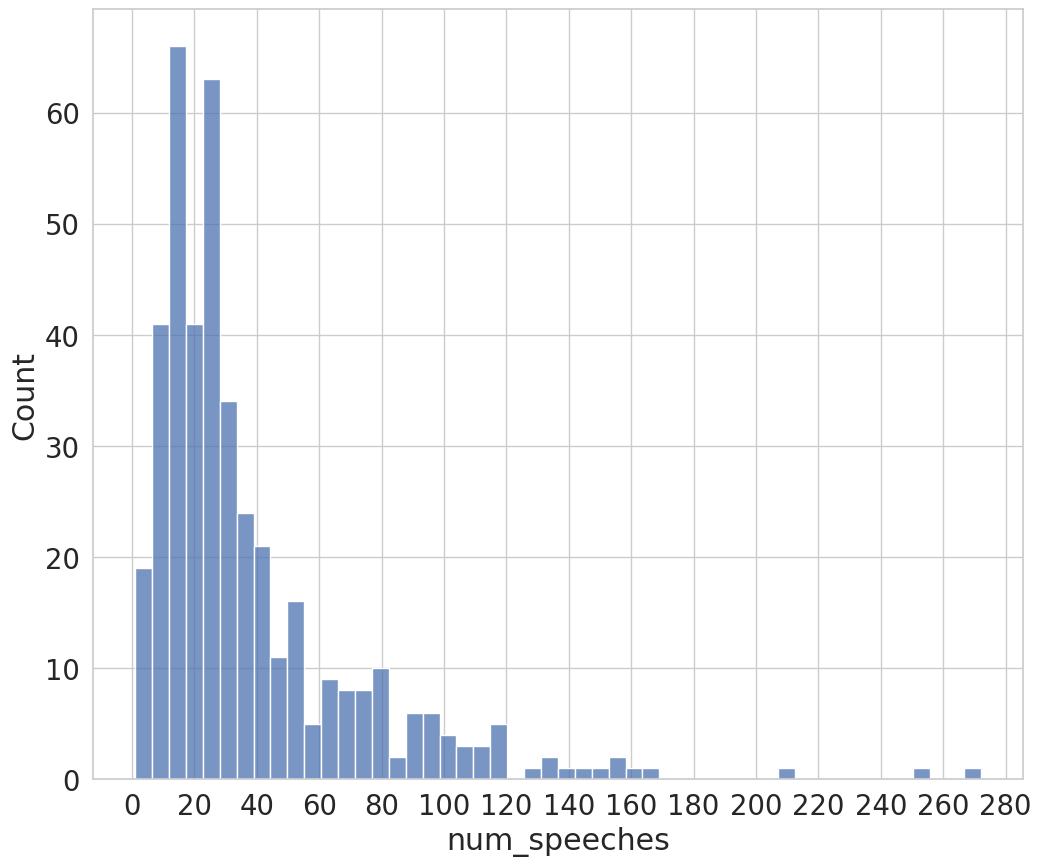

In [ ]:
sns.histplot(data=df_aggregated, x='num_speeches', bins=50)
# add more ticks to x-axis
plt.xticks(np.arange(0, 300, 20))

# most popular verses

In [ ]:
pop = pd.read_csv('/home/laviniad/projects/religion_in_congress/data/most_popular_verses.csv')

In [ ]:
pop.head()

,Unnamed: 0,verse,count,proportion
0,13,UNKNOWN,92915,0.284590
1,79,john 3:16,1653,0.005063
2,412,john 14:6,986,0.003020
3,44,acts 1:8,889,0.002723
4,199,romans 6:23,775,0.002374


/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/laviniad/miniconda3/envs/cuda-sermons/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

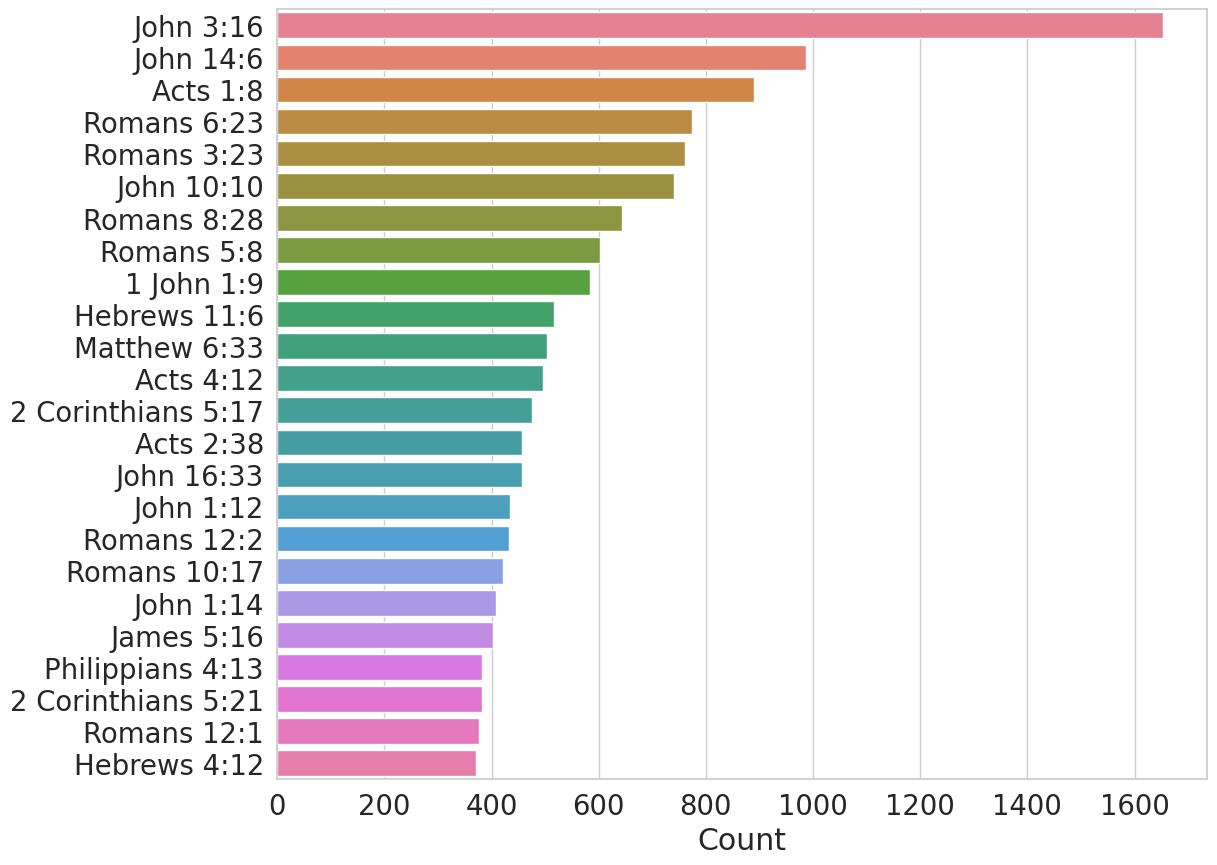

In [ ]:
# barplot of pop

fixed_pop = pop.dropna(subset=['count'])
fixed_pop = fixed_pop.nlargest(25, 'count')
fixed_pop = fixed_pop[fixed_pop['verse'] != 'UNKNOWN']
# caps all words
fixed_pop['verse'] = fixed_pop['verse'].apply(lambda x: ' '.join([e.capitalize() for e in x.split()]))

sns.barplot(data=fixed_pop, x='count', y='verse', hue='verse')
plt.xlabel("Count")
plt.ylabel(None)
plt.show()

<Axes: xlabel='Count', ylabel='count'>

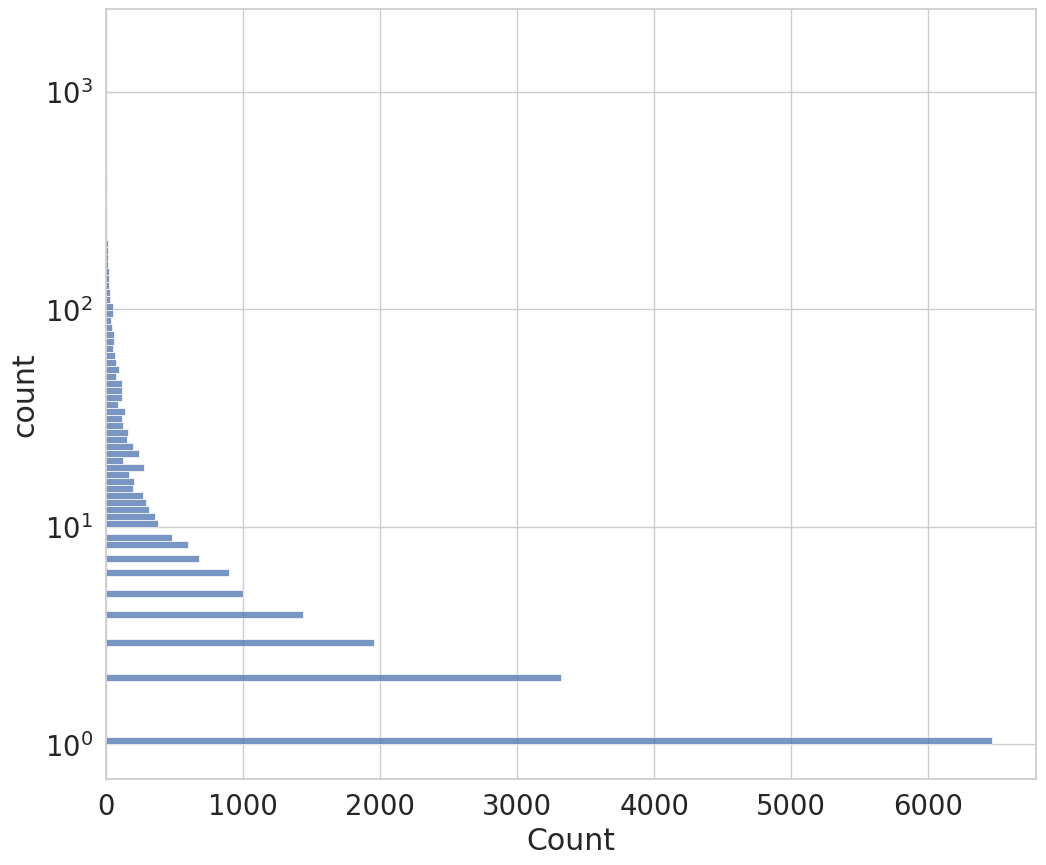

In [ ]:
new_pop = pop[pop['verse'] != 'UNKNOWN']
sns.histplot(y=new_pop['count'], bins=100, log_scale=True)

# redo BR citation search

In [ ]:
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name().replace('_', ' '))
    return synonyms

bible_synonyms = set(get_synonyms("Bible"))
bible_pattern = "|".join(bible_synonyms) + "|" + "Old Testament" + "|" + "New Testament"

says_synonyms = set(get_synonyms("says"))
says_pattern = "|".join(says_synonyms)

In [ ]:
final_pattern = rf'(?:{bible_pattern}) (?:{says_pattern})'

print(final_pattern)

(?:Holy Scripture|Holy Writ|Good Book|Christian Bible|bible|Book|Word|Scripture|Word of God|Bible|Old Testament|New Testament) (?:enunciate|pronounce|read|suppose|allege|order|enounce|sound out|say|enjoin|aver|tell|state|articulate)
